### Problem statment

Let's suppose, that there are a grup of objects - hunters. The goal of each hunter is to follow the group and be  be at a given target distance from  neighbour hunters with given a accuracy.
Hunter problem is that he knows restricted amount of information:



1. Dirrection of closest hunter velocity $v_{c}$: $\frac{v_{c}}{||v_{c}||}$
2. Does hunter distance to closest hunter reduced: $\{0,1\}$
3. Is closest hunter at the target distance with given accuracy: $\{0,1\}$
4. Dirrection of group velocity $v_{g}$: $\frac{v_{g}}{||v_{g}||}$
5. Does hunter distance to group center reduced: $\{0,1\}$
6. Dirrection of hunter velocity $v_{h}$: $\frac{v_{h}}{||v_{h}||}$
7. Hunter force: $f_{h}$

In descrete time case hunter will have the following information:

1. Dirrection of closest hunter velocity: $\frac{x_{h_{c}}^0 - x_{h_{c}}^{-1}}{||x_{h_{c}}^0 - x_{h_{c}}^{-1}||}$

    $ c = arg \min\limits_{k\ne i} \left|\left|x_{h_i}^{-1}-x_{h_k}^{-1}\right|\right|$

2. Does hunter distance to closest neighbour hunter reduced: $h\left(d_i^{0}- d_i^{1}\right)$

    $ d_i^{-1} = \min\limits_{k\ne i} \left|\left|x_{h_i}^{-1}-x_{h_k}^{-1}\right|\right|$

    $ d_i^{0} = \min\limits_{k\ne i} \left|\left|x_{h_i}^{0}-x_{h_k}^{0}\right|\right|$

3. Is closest hunter at the target distance $d_t$ with given accuracy $e_t$: $h \left(\left|\,\left|\left|x_{h}^0-x_{c}^0\right|\right|-d_t \,\right|- e_t\right)$

4. Dirrection of group velocity: $\frac{x_{g}^0 - x_{g}^{-1}}{||x_{g}^0 - x_{g}^{-1}||}$

    $x_g^{-1} = \overline{x_h}^{-1}$

    $x_g^{0} = \overline{x_h}^{0}$

5. Does hunter distance to group center reduced: $h\left(\left|\left|x_{h}^{-1}-x_{g}^{-1}\right|\right|-\left|\left|x_{h}^0-x_{g}^0\right|\right|\right)$

6. Dirrection of hunter velocity: $\frac{x_{h_i}^0 - x_{h_i}^{-1}}{||x_{h_i}^0 - x_{h_i}^{-1}||}$

7. Hunter force: $f_{h_i}^{-1}$

### Environment

#### Hunter policy

Since hunter may moove only with speed constrained by some constant, we need to
constrain action space. Let's define max speed as $v_{max}$.
We may define our distribution via some function $G(x)$ from simple normal distribution $\mathcal{N}(x|\mu,diag(e^{2 s}))$.
Let's define function $g(x)$ so, that it was constrained in circle with radius $v_{max}$:
$$
G(x) = v_{max}\frac{x}{||x||_2}e^{-||x||_2^2} 
$$

$$\nabla_x\left[\textbf{f}(x)g(x)\right] = \frac{d\textbf{f}(x)}{dx}g(x)+\frac{dg(x)}{dx} \textbf{f}(x)^T $$

$$ \nabla_x G(x) =v_{max} \left( \frac{e^{-||x||_2^2}}{||x||_2} I + \nabla_x\left[\frac{e^{-||x||_2^2}}{||x||_2}\right]x^T\right) $$

$$ \nabla_x\left[\frac{e^{-||x||_2^2}}{||x||_2}\right] = \nabla_{||x||_2}\left[\frac{e^{-||x||_2^2}}{||x||_2}\right]\nabla_x||x||_2$$

$$\nabla_x||x||_2 = \frac{x}{||x||_2}$$
$$  \nabla_{||x||_2}\left[\frac{e^{-||x||_2^2}}{||x||_2}\right] = -\left[\frac{1}{||x||_2^2}+2\right]e^{-||x||_2^2}$$

$$ \nabla_x G(x) =v_{max}\frac{e^{-||x||_2^2}}{||x||_2} \left(I -\left[\frac{1}{||x||_2^2}+2\right] x x^T\right)  $$

$$\mathcal{J}_{G(x)}=-\left(v_{max} \frac{e^{-||x||_2^2}}{||x||_2}\right)^n \left(1-\left[\frac{1}{||x||_2^2}+2\right]||x||_2^2 \right) = 2\left(v_{max} \frac{e^{-||x||_2^2}}{||x||_2}\right)^n ||x||_2^2 $$

for 2 dimentions:
$$\mathcal{J}_{G(x)}=2 v_{max}^2 e^{-2||x||_2^2}$$

$$\ln(\mathcal{J}_{G(x)}^{-1})=2\left(||x||_2^2-\ln v_{max}\right)-\ln 2$$

So, PDF of distribution rv G(x) may be estimated as following:
$$\mathcal{N}(x|\mu,diag(e^{2s}))J_{G(x)}^{-1}$$

#### Reward assignmend

Reword is equal to:

    if closest hunter at the target distence: 1

    else, if distance to closest huter reduced: 0
   
    else: -1

In [1]:
import torch
from policy import HunterPolicy, VictimPolicy, Baseline
from environment import GroupedHunterEnvironment

from train import train, visualize_group
%matplotlib inline

env = GroupedHunterEnvironment()

baseline = Baseline(env)
policy = HunterPolicy(env,max_action=3)

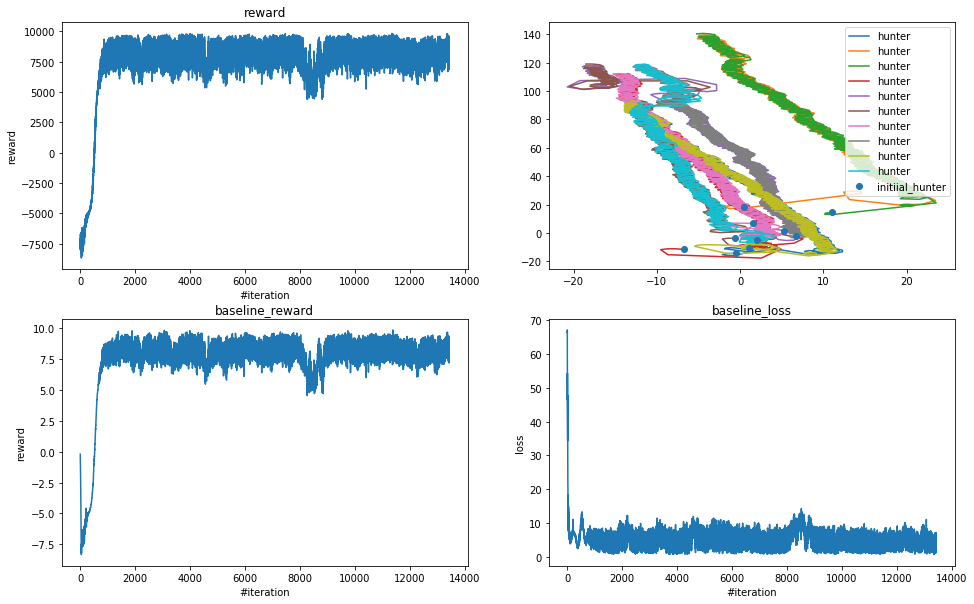

Episode 13440 	Last reward: 9462.00
Last reward: 9.00


KeyboardInterrupt: 

In [2]:
train(policy,env,100000, learning_rate=0.0001, baseline=baseline)

In [2]:
policy = torch.load('force_policy_ellipse_max_action_3.p')

FileNotFoundError: [Errno 2] No such file or directory: 'force_policy_ellipse_max_action_3.p'

In [3]:
torch.save(policy,'grouped_force_policy_max_force_3_num_hunters_10.p')
policy = torch.load('grouped_force_policy_max_force_3_num_hunters_10.p')

### Test Visualization

<IPython.core.display.Javascript object>


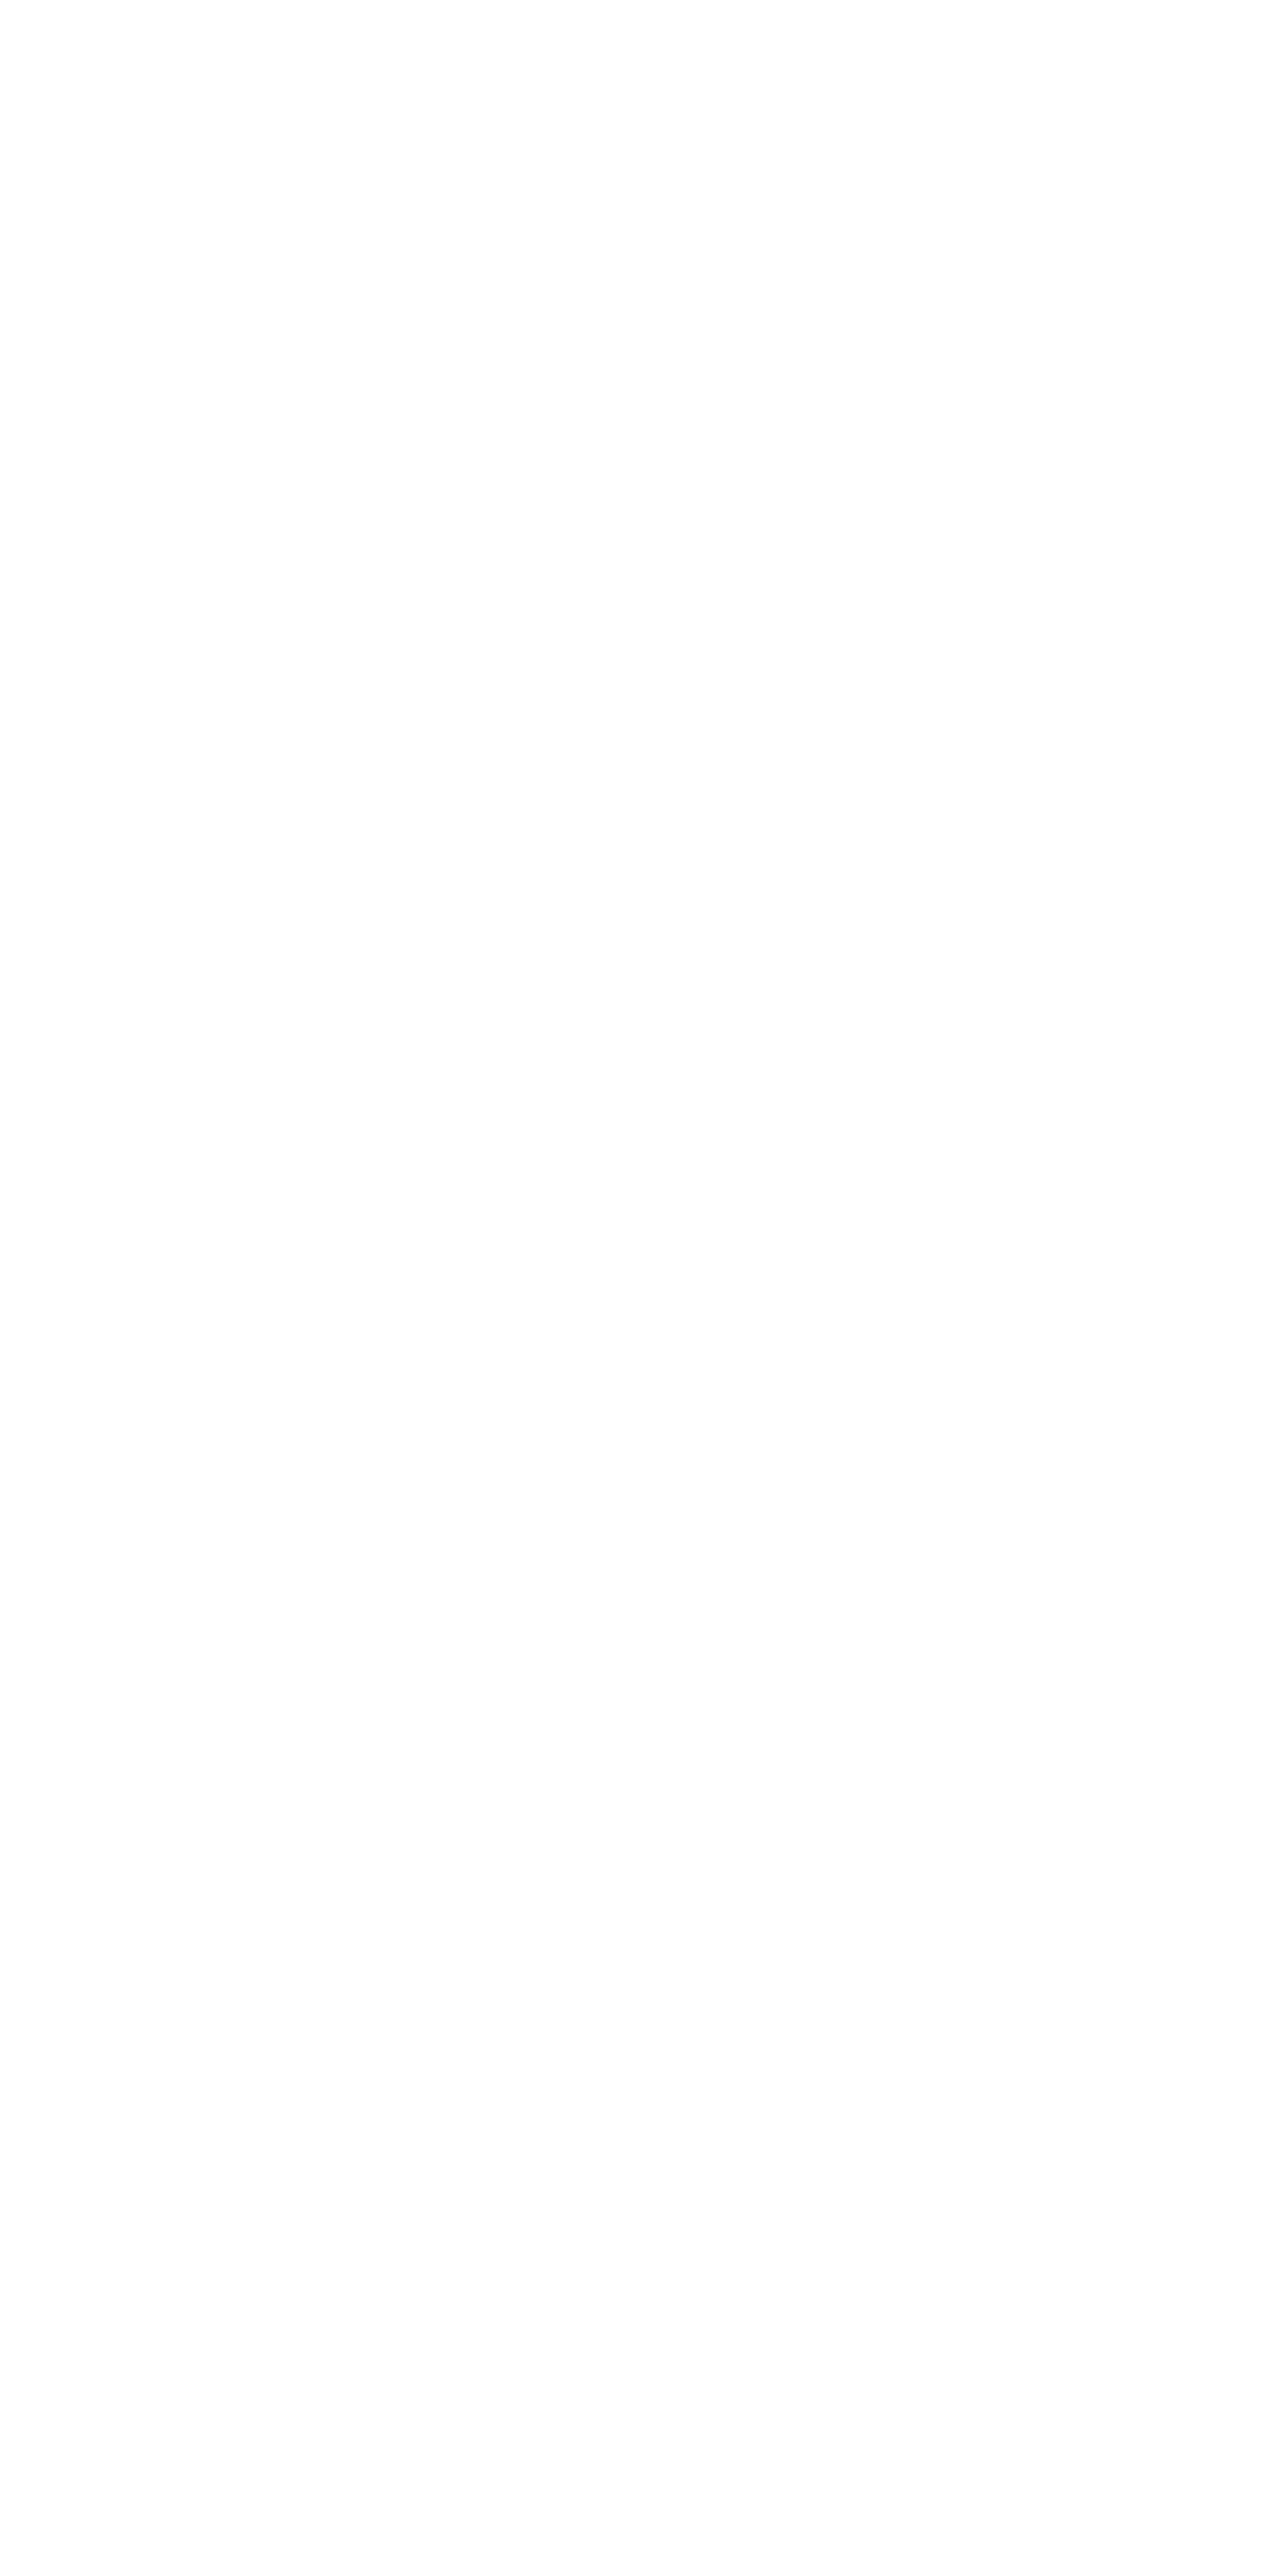

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


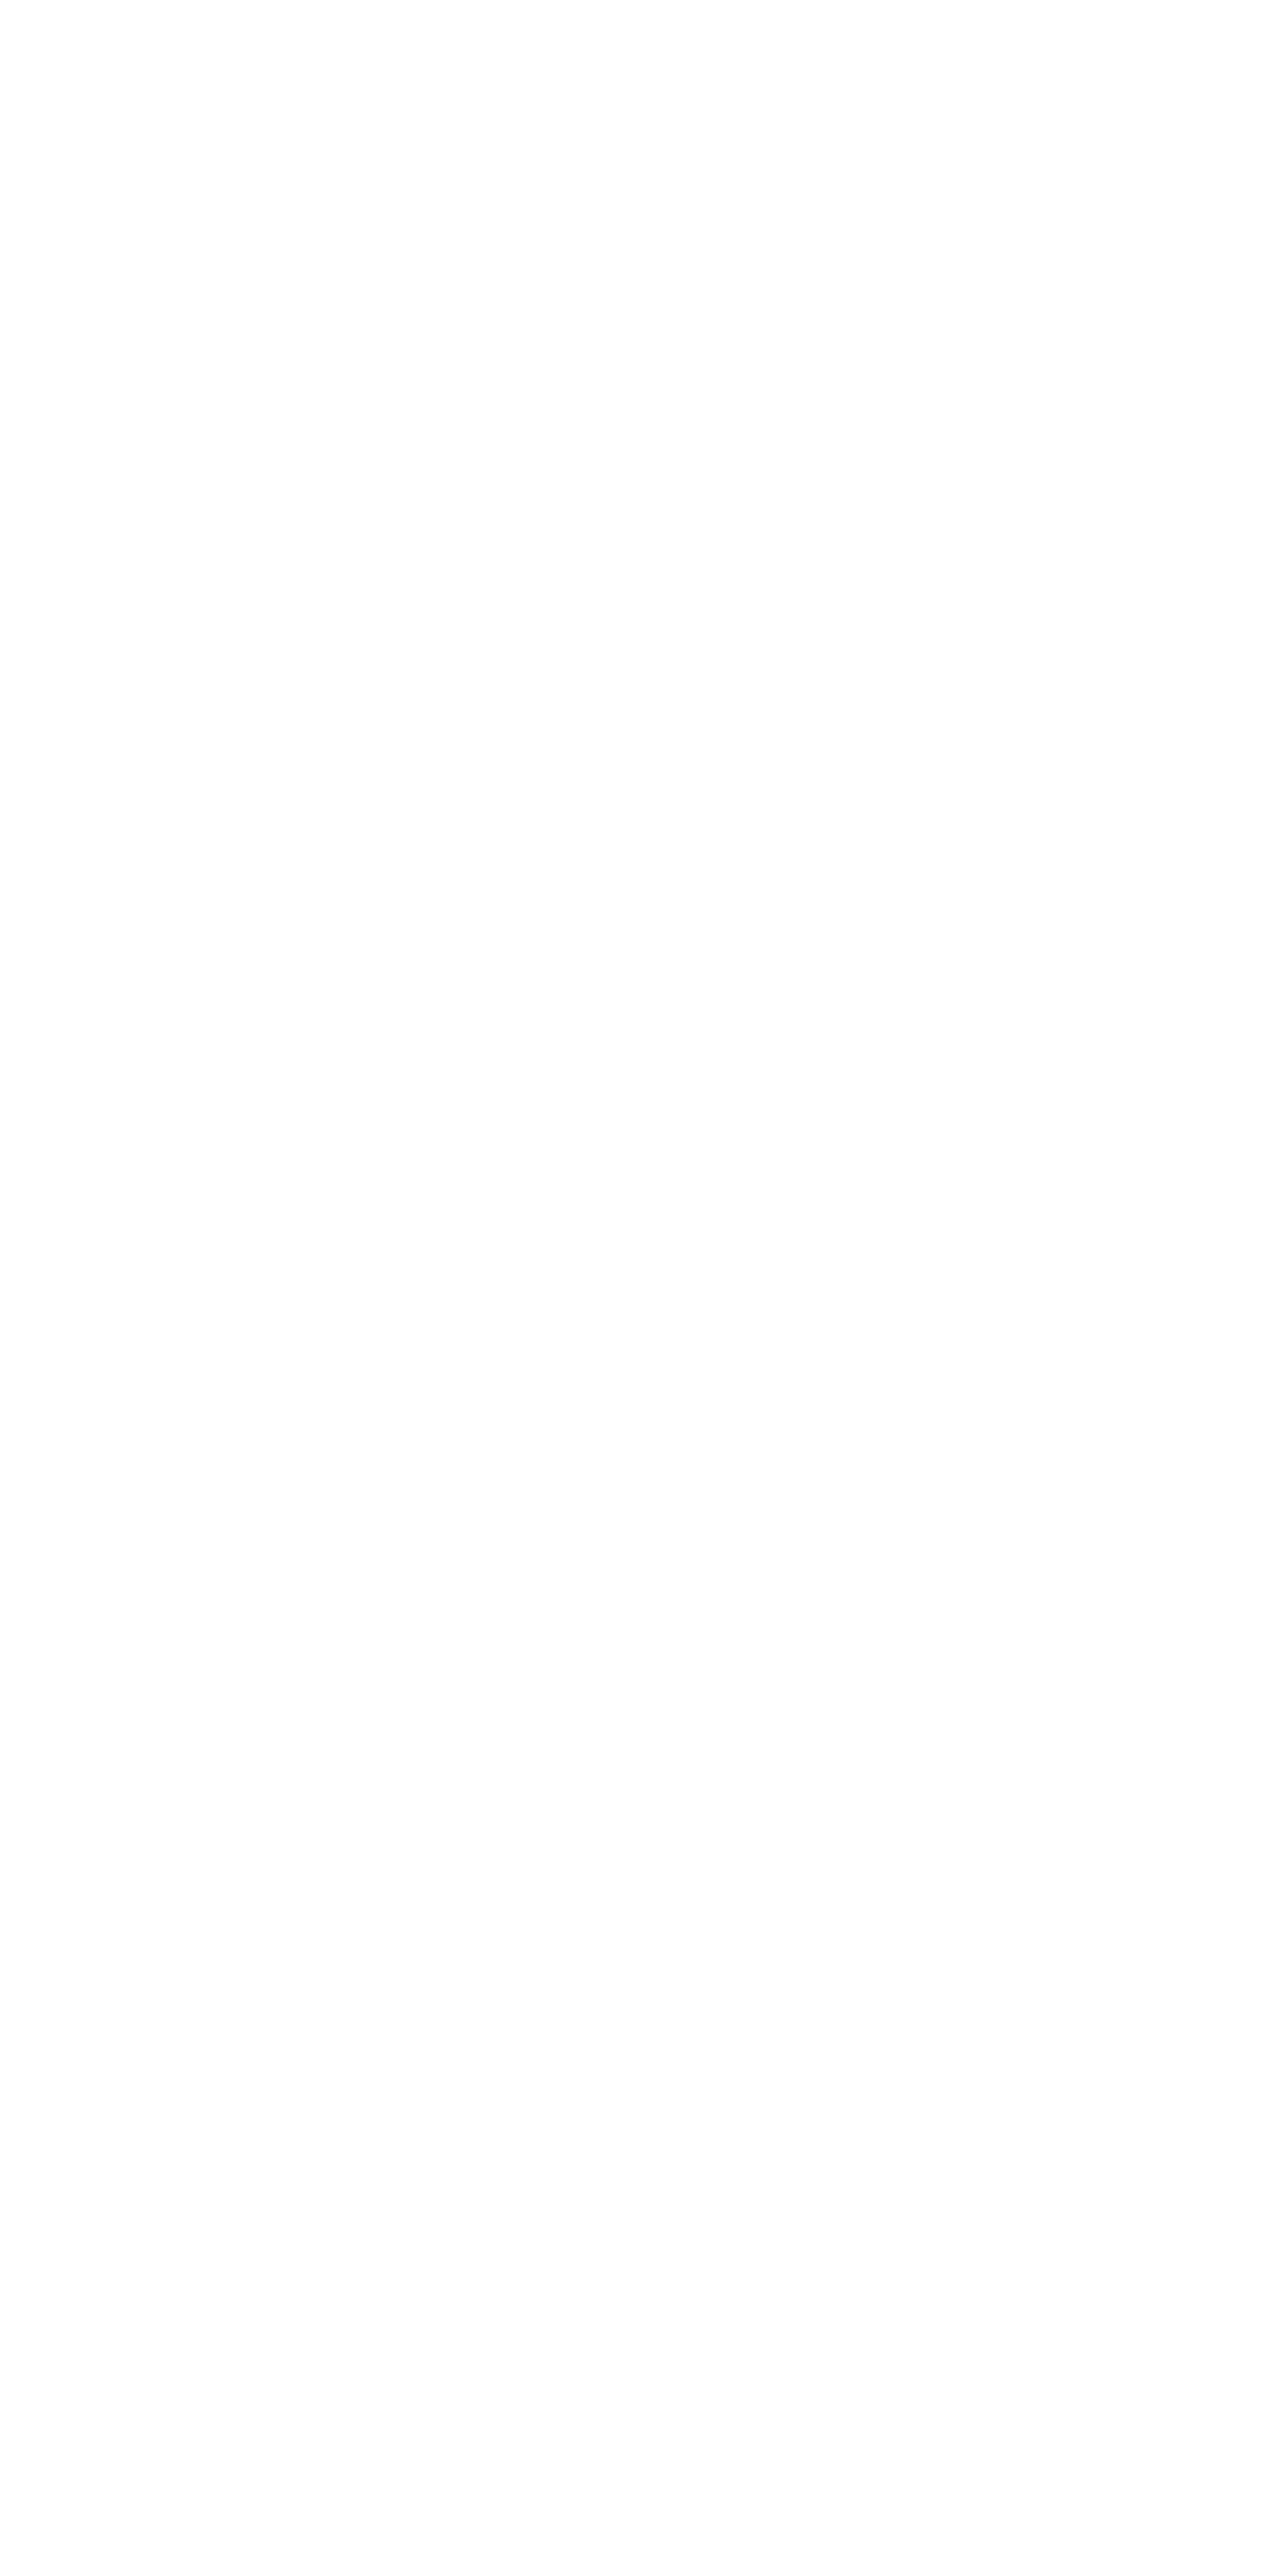

In [4]:
from grouped_visualization import model_hunter_learning
%matplotlib notebook

             

model_hunter_learning('Test. max action = 3',policy,env)